In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [0]:
tr1 = pd.read_csv('/content/drive/My Drive/Colab Notebooks/pd-ds-coh-team1/data/transactions_1.txt')
tr2 = pd.read_csv('/content/drive/My Drive/Colab Notebooks/pd-ds-coh-team1/data/transactions_2.txt')
tr3 = pd.read_csv('/content/drive/My Drive/Colab Notebooks/pd-ds-coh-team1/data/transactions_3.txt')


tr = pd.concat([tr1,tr2,tr3])

In [352]:
tr.head(2)

,transaction_id,transactions_type,transactions_currency,amount_usd,transactions_state,ea_cardholderpresence,ea_merchant_mcc,ea_merchant_city,ea_merchant_country,direction,user_id,created_date
0,transaction_0,TRANSFER,AED,4.55,COMPLETED,NaN,NaN,NaN,NaN,OUTBOUND,user_4368,2018-04-03 03:34:21.784487
1,transaction_1,CARD_PAYMENT,AED,15.50,COMPLETED,FALSE,4111.0,Dubai,ARE,OUTBOUND,user_2355,2019-03-19 06:15:59.537032


In [0]:
tr['amount_usd'] = tr['amount_usd'].astype(int)

In [0]:
sumlen = tr.groupby(['user_id'])['amount_usd'].agg([sum,len])

In [355]:
sumlen

,sum,len
user_id,,
user_0,6824,545
user_1,14100,146
user_10,6191,143
user_100,6314,66
user_1000,886,47
...,...,...
user_9995,320,8
user_9996,1696,37
user_9997,15004,146


In [0]:
sumlen=sumlen.rename(columns={"len" : "number of trans"})
sumlen=sumlen.rename(columns={"sum" : "sum of trans"})

In [357]:
sumlen

,sum of trans,number of trans
user_id,,
user_0,6824,545
user_1,14100,146
user_10,6191,143
user_100,6314,66
user_1000,886,47
...,...,...
user_9995,320,8
user_9996,1696,37
user_9997,15004,146


In [0]:
usr = pd.read_csv('/content/drive/My Drive/Colab Notebooks/pd-ds-coh-team1/data/users.txt')

In [359]:
usr.head(2)

,user_id,birth_year,country,city,created_date,user_settings_crypto_unlocked,plan,attributes_notifications_marketing_push,attributes_notifications_marketing_email,num_contacts,num_referrals,num_successful_referrals
0,user_0,1992,ES,Madrid,2018-09-10 18:46:42.843855,0,STANDARD,1.0,1.0,3,0,0
1,user_1,1985,LT,Klaipeda,2018-01-11 18:53:10.531146,1,STANDARD,NaN,NaN,75,0,0


In [0]:
merged_left = pd.merge(left=usr, right=sumlen, how='left', left_on='user_id', right_on='user_id')

In [361]:
merged_left

,user_id,birth_year,country,city,created_date,user_settings_crypto_unlocked,plan,attributes_notifications_marketing_push,attributes_notifications_marketing_email,num_contacts,num_referrals,num_successful_referrals,sum of trans,number of trans
0,user_0,1992,ES,Madrid,2018-09-10 18:46:42.843855,0,STANDARD,1.0,1.0,3,0,0,6824.0,545.0
1,user_1,1985,LT,Klaipeda,2018-01-11 18:53:10.531146,1,STANDARD,NaN,NaN,75,0,0,14100.0,146.0
2,user_2,1996,IE,Carrickmacross,2018-11-29 17:29:16.879324,0,STANDARD,NaN,NaN,71,0,0,2873.0,282.0
3,user_3,1981,IE,Dublin,2018-02-17 11:58:08.319664,0,STANDARD,NaN,NaN,219,0,0,8191.0,158.0
4,user_4,1992,GB,London,2018-01-08 18:40:21.097856,0,STANDARD,NaN,NaN,0,0,0,1047.0,59.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15539,user_15539,1997,PL,Bralin,2018-08-05 05:56:40.787458,0,STANDARD,1.0,1.0,0,0,0,6353.0,134.0
15540,user_15540,1985,PL,Poznań,2018-03-29 12:19:05.567779,0,STANDARD,NaN,NaN,0,0,0,92.0,16.0
15541,user_15541,1978,GB,London,2018-07-13 15:56:50.339746,0,STANDARD,1.0,1.0,16,0,0,19173.0,1115.0
15542,user_15542,1977,IE,Dublin,2018-01-07 15:53:43.719983,0,GOLD,1.0,1.0,44,0,0,429.0,30.0


In [362]:
merged_left.isna().sum()

user_id                                        0
birth_year                                     0
country                                        0
city                                           0
created_date                                   0
user_settings_crypto_unlocked                  0
plan                                           0
attributes_notifications_marketing_push     5260
attributes_notifications_marketing_email    5260
num_contacts                                   0
num_referrals                                  0
num_successful_referrals                       0
sum of trans                                 532
number of trans                              532
dtype: int64

In [363]:
result = sumlen.merge(usr, left_on='user_id', right_on='user_id')
result.fillna(0)

,user_id,sum of trans,number of trans,birth_year,country,city,created_date,user_settings_crypto_unlocked,plan,attributes_notifications_marketing_push,attributes_notifications_marketing_email,num_contacts,num_referrals,num_successful_referrals
0,user_0,6824,545,1992,ES,Madrid,2018-09-10 18:46:42.843855,0,STANDARD,1.0,1.0,3,0,0
1,user_1,14100,146,1985,LT,Klaipeda,2018-01-11 18:53:10.531146,1,STANDARD,0.0,0.0,75,0,0
2,user_10,6191,143,2000,LT,Klaipėda,2018-01-26 18:40:43.166413,1,STANDARD,1.0,1.0,19,0,0
3,user_100,6314,66,1986,FR,Montfort sur argens,2018-12-02 14:18:09.034151,0,STANDARD,0.0,0.0,0,0,0
4,user_1000,886,47,1988,SE,Malmö,2018-03-22 22:08:56.267644,0,GOLD,1.0,1.0,13,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15007,user_9995,320,8,1989,PL,Łańcut,2018-06-05 06:16:51.861843,0,STANDARD,1.0,1.0,0,0,0
15008,user_9996,1696,37,1964,GB,London,2018-10-26 03:59:55.030756,0,STANDARD,0.0,0.0,0,0,0
15009,user_9997,15004,146,1991,GB,High Wycombe,2018-08-18 04:07:31.402857,0,STANDARD,0.0,0.0,6,0,0
15010,user_9998,634,36,1990,PL,Poznań,2019-01-02 02:17:00.962571,0,STANDARD,0.0,0.0,21,0,0


In [364]:
eda = pd.read_csv('/content/drive/My Drive/Colab Notebooks/pd-ds-coh-team1/users-eda.txt')
eda.drop(['Unnamed: 0'],axis=1,inplace=True)
eda

,user_id,user_settings_crypto_unlocked,attributes_notifications_marketing_push,attributes_notifications_marketing_email,new_num_contacts,new_age,gb,pl,fr,ie,ro,es,lt,pt,mt,de,ch,cz,it,gr,cy,other_country,paid
0,user_0,0,1.0,1.0,3,28,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
1,user_1,1,1.0,1.0,47,35,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
2,user_2,0,1.0,1.0,47,24,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
3,user_3,0,1.0,1.0,47,39,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
4,user_4,0,1.0,0.0,0,28,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15539,user_15539,0,1.0,1.0,0,23,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
15540,user_15540,0,1.0,1.0,0,35,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
15541,user_15541,0,1.0,1.0,16,42,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
15542,user_15542,0,1.0,1.0,44,43,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,2


In [365]:
result = sumlen.merge(eda, left_on='user_id', right_on='user_id',how='left')
result.fillna(0)

,user_id,sum of trans,number of trans,user_settings_crypto_unlocked,attributes_notifications_marketing_push,attributes_notifications_marketing_email,new_num_contacts,new_age,gb,pl,fr,ie,ro,es,lt,pt,mt,de,ch,cz,it,gr,cy,other_country,paid
0,user_0,6824,545,0,1.0,1.0,3,28,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
1,user_1,14100,146,1,1.0,1.0,47,35,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
2,user_10,6191,143,1,1.0,1.0,19,20,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
3,user_100,6314,66,0,1.0,1.0,0,34,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,user_1000,886,47,0,1.0,1.0,13,32,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15007,user_9995,320,8,0,1.0,1.0,0,31,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
15008,user_9996,1696,37,0,1.0,0.0,0,56,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
15009,user_9997,15004,146,0,1.0,1.0,6,29,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
15010,user_9998,634,36,0,1.0,1.0,21,30,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [0]:
result.to_csv('userss.txt')

In [367]:
tr[(tr['transactions_state']=='COMPLETED') | (tr['transactions_state']=='REVERTED')]

,transaction_id,transactions_type,transactions_currency,amount_usd,transactions_state,ea_cardholderpresence,ea_merchant_mcc,ea_merchant_city,ea_merchant_country,direction,user_id,created_date
0,transaction_0,TRANSFER,AED,4,COMPLETED,NaN,NaN,NaN,NaN,OUTBOUND,user_4368,2018-04-03 03:34:21.784487
1,transaction_1,CARD_PAYMENT,AED,15,COMPLETED,FALSE,4111.0,Dubai,ARE,OUTBOUND,user_2355,2019-03-19 06:15:59.537032
2,transaction_2,CARD_PAYMENT,AED,43,COMPLETED,FALSE,5814.0,Dubai,ARE,OUTBOUND,user_2355,2019-03-18 18:53:41.323032
3,transaction_3,TRANSFER,AED,10043,COMPLETED,NaN,NaN,NaN,NaN,OUTBOUND,user_2355,2019-03-22 14:20:01.513032
4,transaction_4,CARD_PAYMENT,AED,43,COMPLETED,FALSE,5651.0,Abu Dhabi,ARE,OUTBOUND,user_14318,2019-03-22 05:42:50.316652
...,...,...,...,...,...,...,...,...,...,...,...,...
681020,transaction_2181020,TRANSFER,EUR,46,COMPLETED,NaN,NaN,NaN,NaN,INBOUND,user_1011,2019-04-30 10:14:11.002961
681022,transaction_2181022,TRANSFER,EUR,1,COMPLETED,NaN,NaN,NaN,NaN,OUTBOUND,user_1011,2019-04-30 10:10:36.810961
681023,transaction_2181023,TRANSFER,EUR,4,COMPLETED,NaN,NaN,NaN,NaN,OUTBOUND,user_3170,2019-05-01 11:34:25.078035
681024,transaction_2181024,TRANSFER,EUR,1,COMPLETED,NaN,NaN,NaN,NaN,OUTBOUND,user_8195,2019-04-30 16:51:26.445105


In [0]:
tr['month_of_trans']=tr['created_date'].str[5:7] 
tr['month_of_trans']=tr['month_of_trans'].astype('int')

In [0]:
tr['year']=tr['created_date'].str[:4] 
tr['year']=tr['year'].astype('int')

In [0]:
tr['yearmonth'] = tr['created_date'].str[:7]
tr['yearmonth'] = tr['yearmonth'].str.replace('-','')


In [0]:
tr['yearmonth']=tr['yearmonth'].astype('int')

In [433]:
tr

,transaction_id,transactions_type,transactions_currency,amount_usd,transactions_state,ea_cardholderpresence,ea_merchant_mcc,ea_merchant_city,ea_merchant_country,direction,user_id,created_date,month_of_trans,year,yearmonth,q1,q4,q2,q3,2018,2019
0,transaction_0,TRANSFER,AED,4,COMPLETED,NaN,NaN,NaN,NaN,OUTBOUND,user_4368,2018-04-03 03:34:21.784487,q2,0,201804,0,0,1,0,1,0
1,transaction_1,CARD_PAYMENT,AED,15,COMPLETED,FALSE,4111.0,Dubai,ARE,OUTBOUND,user_2355,2019-03-19 06:15:59.537032,q1,1,201903,1,0,0,0,0,1
2,transaction_2,CARD_PAYMENT,AED,43,COMPLETED,FALSE,5814.0,Dubai,ARE,OUTBOUND,user_2355,2019-03-18 18:53:41.323032,q1,1,201903,1,0,0,0,0,1
3,transaction_3,TRANSFER,AED,10043,COMPLETED,NaN,NaN,NaN,NaN,OUTBOUND,user_2355,2019-03-22 14:20:01.513032,q1,1,201903,1,0,0,0,0,1
4,transaction_4,CARD_PAYMENT,AED,43,COMPLETED,FALSE,5651.0,Abu Dhabi,ARE,OUTBOUND,user_14318,2019-03-22 05:42:50.316652,q1,1,201903,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
681021,transaction_2181021,TOPUP,EUR,18,FAILED,NaN,NaN,NaN,NaN,INBOUND,user_6926,2019-05-01 09:30:06.606771,q2,1,201905,0,0,1,0,0,1
681022,transaction_2181022,TRANSFER,EUR,1,COMPLETED,NaN,NaN,NaN,NaN,OUTBOUND,user_1011,2019-04-30 10:10:36.810961,q2,1,201904,0,0,1,0,0,1
681023,transaction_2181023,TRANSFER,EUR,4,COMPLETED,NaN,NaN,NaN,NaN,OUTBOUND,user_3170,2019-05-01 11:34:25.078035,q2,1,201905,0,0,1,0,0,1
681024,transaction_2181024,TRANSFER,EUR,1,COMPLETED,NaN,NaN,NaN,NaN,OUTBOUND,user_8195,2019-04-30 16:51:26.445105,q2,1,201904,0,0,1,0,0,1


In [428]:
tr['month_of_trans'].value_counts()
type(tr['month_of_trans'].keys())

pandas.core.indexes.numeric.Int64Index

In [0]:
yearsgroup ={2018:0,2019:1}

tr['year']=tr['year'].replace(yearsgroup)

In [0]:
monthsgroup={12:'q4',1:'q1',2:'q1',
             3:'q1',4:'q2',5:'q2',6:'q2',7:'q3',8:'q3',9:'q3',10:'q4',11:'q4'}


tr['month_of_trans']=tr['month_of_trans'].replace(monthsgroup)

In [0]:
ymgroup ={201812:'2018_q4',201801:'2018_q1',201802:'2018_q1',
             201803:'2018_q1',201804:'2018_q2',201805:'2018_q2',201806:'2018_q2',201807:'2018_q3',201808:'2018_q3',
          201809:'2018_q3',201810:'2018_q4',201811:'2018_q4',
          201912:'2019_q4',201901:'2019_q1',201902:'2019_q1',
             201903:'2019_q1',201904:'2019_q2',201905:'2019_q2',201906:'2019_q2',201907:'2019_q3',201908:'2019_q3',
          201909:'2019_q3',201910:'2019_q4',201911:'2019_q4'}
tr['yearmonth']=tr['yearmonth'].replace(ymgroup)

In [445]:
tr

,transaction_id,transactions_type,transactions_currency,amount_usd,transactions_state,ea_cardholderpresence,ea_merchant_mcc,ea_merchant_city,ea_merchant_country,direction,user_id,created_date,month_of_trans,year,yearmonth,q1,q4,q2,q3,2018,2019
0,transaction_0,TRANSFER,AED,4,COMPLETED,NaN,NaN,NaN,NaN,OUTBOUND,user_4368,2018-04-03 03:34:21.784487,q2,0,2018_q2,0,0,1,0,1,0
1,transaction_1,CARD_PAYMENT,AED,15,COMPLETED,FALSE,4111.0,Dubai,ARE,OUTBOUND,user_2355,2019-03-19 06:15:59.537032,q1,1,2019_q1,1,0,0,0,0,1
2,transaction_2,CARD_PAYMENT,AED,43,COMPLETED,FALSE,5814.0,Dubai,ARE,OUTBOUND,user_2355,2019-03-18 18:53:41.323032,q1,1,2019_q1,1,0,0,0,0,1
3,transaction_3,TRANSFER,AED,10043,COMPLETED,NaN,NaN,NaN,NaN,OUTBOUND,user_2355,2019-03-22 14:20:01.513032,q1,1,2019_q1,1,0,0,0,0,1
4,transaction_4,CARD_PAYMENT,AED,43,COMPLETED,FALSE,5651.0,Abu Dhabi,ARE,OUTBOUND,user_14318,2019-03-22 05:42:50.316652,q1,1,2019_q1,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
681021,transaction_2181021,TOPUP,EUR,18,FAILED,NaN,NaN,NaN,NaN,INBOUND,user_6926,2019-05-01 09:30:06.606771,q2,1,2019_q2,0,0,1,0,0,1
681022,transaction_2181022,TRANSFER,EUR,1,COMPLETED,NaN,NaN,NaN,NaN,OUTBOUND,user_1011,2019-04-30 10:10:36.810961,q2,1,2019_q2,0,0,1,0,0,1
681023,transaction_2181023,TRANSFER,EUR,4,COMPLETED,NaN,NaN,NaN,NaN,OUTBOUND,user_3170,2019-05-01 11:34:25.078035,q2,1,2019_q2,0,0,1,0,0,1
681024,transaction_2181024,TRANSFER,EUR,1,COMPLETED,NaN,NaN,NaN,NaN,OUTBOUND,user_8195,2019-04-30 16:51:26.445105,q2,1,2019_q2,0,0,1,0,0,1


In [446]:
tr['yearmonth'].value_counts()

2019_q1    716145
2018_q4    550445
2018_q3    355452
2019_q2    349790
2018_q2    165526
2018_q1     43668
Name: yearmonth, dtype: int64

In [378]:
tr['year'].value_counts()

0    1115091
1    1065935
Name: year, dtype: int64

In [0]:
import seaborn as sns

In [0]:
onehotq=tr['month_of_trans'].value_counts().index

In [381]:
onehotq

Index(['q1', 'q4', 'q2', 'q3'], dtype='object')

In [0]:
for i in onehotq:
  tr[i]=np.where(tr['month_of_trans']==i,1,0)

In [383]:
onehoty=tr['year'].value_counts().index
onehoty

Int64Index([0, 1], dtype='int64')

In [0]:
onehotmy=tr['yearmonth'].value_counts().index

In [0]:
for i in onehotmy:
  tr[i]=np.where(tr['yearmonth']==i,1,0)

In [0]:
for i in onehoty:
  tr[i]=np.where(tr['year']==i,1,0)

In [0]:
tr.rename(columns={1:'2019'}, inplace=True)
tr.rename(columns={0:'2018'}, inplace=True)



In [449]:
tr

,transaction_id,transactions_type,transactions_currency,amount_usd,transactions_state,ea_cardholderpresence,ea_merchant_mcc,ea_merchant_city,ea_merchant_country,direction,user_id,created_date,month_of_trans,year,yearmonth,q1,q4,q2,q3,2018,2019,2019_q1,2018_q4,2018_q3,2019_q2,2018_q2,2018_q1
0,transaction_0,TRANSFER,AED,4,COMPLETED,NaN,NaN,NaN,NaN,OUTBOUND,user_4368,2018-04-03 03:34:21.784487,q2,0,2018_q2,0,0,1,0,1,0,0,0,0,0,1,0
1,transaction_1,CARD_PAYMENT,AED,15,COMPLETED,FALSE,4111.0,Dubai,ARE,OUTBOUND,user_2355,2019-03-19 06:15:59.537032,q1,1,2019_q1,1,0,0,0,0,1,1,0,0,0,0,0
2,transaction_2,CARD_PAYMENT,AED,43,COMPLETED,FALSE,5814.0,Dubai,ARE,OUTBOUND,user_2355,2019-03-18 18:53:41.323032,q1,1,2019_q1,1,0,0,0,0,1,1,0,0,0,0,0
3,transaction_3,TRANSFER,AED,10043,COMPLETED,NaN,NaN,NaN,NaN,OUTBOUND,user_2355,2019-03-22 14:20:01.513032,q1,1,2019_q1,1,0,0,0,0,1,1,0,0,0,0,0
4,transaction_4,CARD_PAYMENT,AED,43,COMPLETED,FALSE,5651.0,Abu Dhabi,ARE,OUTBOUND,user_14318,2019-03-22 05:42:50.316652,q1,1,2019_q1,1,0,0,0,0,1,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
681021,transaction_2181021,TOPUP,EUR,18,FAILED,NaN,NaN,NaN,NaN,INBOUND,user_6926,2019-05-01 09:30:06.606771,q2,1,2019_q2,0,0,1,0,0,1,0,0,0,1,0,0
681022,transaction_2181022,TRANSFER,EUR,1,COMPLETED,NaN,NaN,NaN,NaN,OUTBOUND,user_1011,2019-04-30 10:10:36.810961,q2,1,2019_q2,0,0,1,0,0,1,0,0,0,1,0,0
681023,transaction_2181023,TRANSFER,EUR,4,COMPLETED,NaN,NaN,NaN,NaN,OUTBOUND,user_3170,2019-05-01 11:34:25.078035,q2,1,2019_q2,0,0,1,0,0,1,0,0,0,1,0,0
681024,transaction_2181024,TRANSFER,EUR,1,COMPLETED,NaN,NaN,NaN,NaN,OUTBOUND,user_8195,2019-04-30 16:51:26.445105,q2,1,2019_q2,0,0,1,0,0,1,0,0,0,1,0,0


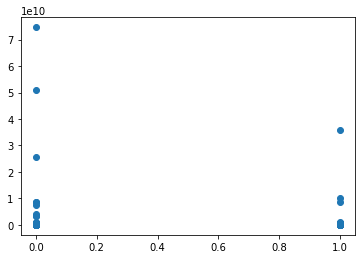

In [387]:
plt.scatter(tr['q1'],tr['amount_usd'])

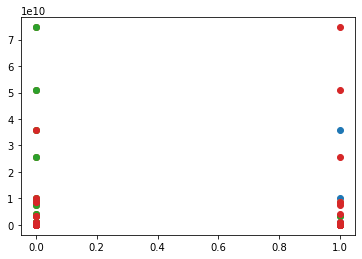

In [388]:
plt.scatter(tr['q1'],tr['amount_usd'])
plt.scatter(tr['q2'],tr['amount_usd'])
plt.scatter(tr['q3'],tr['amount_usd'])
plt.scatter(tr['q4'],tr['amount_usd'])
plt.show()

In [0]:
sum_of_trans_forQ1 = tr.groupby(['user_id'])['q1'].agg([sum])
sum_of_trans_forQ2=tr.groupby(['user_id'])['q2'].agg([sum])

sum_of_trans_forQ3=tr.groupby(['user_id'])['q3'].agg([sum])

sum_of_trans_forQ4=tr.groupby(['user_id'])['q4'].agg([sum])

In [0]:
y1q1=tr.groupby(['user_id'])['2018_q1'].agg([sum])
y1q2=tr.groupby(['user_id'])['2018_q2'].agg([sum])
y1q3=tr.groupby(['user_id'])['2018_q3'].agg([sum])
y1q4=tr.groupby(['user_id'])['2018_q4'].agg([sum])
y2q1=tr.groupby(['user_id'])['2019_q1'].agg([sum])
y2q2=tr.groupby(['user_id'])['2019_q2'].agg([sum])

In [451]:
tr

,transaction_id,transactions_type,transactions_currency,amount_usd,transactions_state,ea_cardholderpresence,ea_merchant_mcc,ea_merchant_city,ea_merchant_country,direction,user_id,created_date,month_of_trans,year,yearmonth,q1,q4,q2,q3,2018,2019,2019_q1,2018_q4,2018_q3,2019_q2,2018_q2,2018_q1
0,transaction_0,TRANSFER,AED,4,COMPLETED,NaN,NaN,NaN,NaN,OUTBOUND,user_4368,2018-04-03 03:34:21.784487,q2,0,2018_q2,0,0,1,0,1,0,0,0,0,0,1,0
1,transaction_1,CARD_PAYMENT,AED,15,COMPLETED,FALSE,4111.0,Dubai,ARE,OUTBOUND,user_2355,2019-03-19 06:15:59.537032,q1,1,2019_q1,1,0,0,0,0,1,1,0,0,0,0,0
2,transaction_2,CARD_PAYMENT,AED,43,COMPLETED,FALSE,5814.0,Dubai,ARE,OUTBOUND,user_2355,2019-03-18 18:53:41.323032,q1,1,2019_q1,1,0,0,0,0,1,1,0,0,0,0,0
3,transaction_3,TRANSFER,AED,10043,COMPLETED,NaN,NaN,NaN,NaN,OUTBOUND,user_2355,2019-03-22 14:20:01.513032,q1,1,2019_q1,1,0,0,0,0,1,1,0,0,0,0,0
4,transaction_4,CARD_PAYMENT,AED,43,COMPLETED,FALSE,5651.0,Abu Dhabi,ARE,OUTBOUND,user_14318,2019-03-22 05:42:50.316652,q1,1,2019_q1,1,0,0,0,0,1,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
681021,transaction_2181021,TOPUP,EUR,18,FAILED,NaN,NaN,NaN,NaN,INBOUND,user_6926,2019-05-01 09:30:06.606771,q2,1,2019_q2,0,0,1,0,0,1,0,0,0,1,0,0
681022,transaction_2181022,TRANSFER,EUR,1,COMPLETED,NaN,NaN,NaN,NaN,OUTBOUND,user_1011,2019-04-30 10:10:36.810961,q2,1,2019_q2,0,0,1,0,0,1,0,0,0,1,0,0
681023,transaction_2181023,TRANSFER,EUR,4,COMPLETED,NaN,NaN,NaN,NaN,OUTBOUND,user_3170,2019-05-01 11:34:25.078035,q2,1,2019_q2,0,0,1,0,0,1,0,0,0,1,0,0
681024,transaction_2181024,TRANSFER,EUR,1,COMPLETED,NaN,NaN,NaN,NaN,OUTBOUND,user_8195,2019-04-30 16:51:26.445105,q2,1,2019_q2,0,0,1,0,0,1,0,0,0,1,0,0


In [0]:
sum_of_years_for2018 = tr.groupby(['user_id'])['2018'].agg([sum])
sum_of_years_for2019=tr.groupby(['user_id'])['2019'].agg([sum])



In [392]:
sum_of_years_for2018

,sum
user_id,
user_0,375
user_1,55
user_10,100
user_100,16
user_1000,0
...,...
user_9995,4
user_9996,28
user_9997,80


In [393]:

sum_of_trans_forQ2

,sum
user_id,
user_0,92
user_1,39
user_10,30
user_100,0
user_1000,38
...,...
user_9995,8
user_9996,0
user_9997,38


In [0]:
trans_of_q1=tr.groupby(['q3'])['amount_usd'].agg([sum])

In [395]:
trans_of_q1

,sum
q3,
0,251268122592
1,8103969807


In [396]:
tr

,transaction_id,transactions_type,transactions_currency,amount_usd,transactions_state,ea_cardholderpresence,ea_merchant_mcc,ea_merchant_city,ea_merchant_country,direction,user_id,created_date,month_of_trans,year,yearmonth,q1,q4,q2,q3,2018,2019
0,transaction_0,TRANSFER,AED,4,COMPLETED,NaN,NaN,NaN,NaN,OUTBOUND,user_4368,2018-04-03 03:34:21.784487,q2,0,NaN,0,0,1,0,1,0
1,transaction_1,CARD_PAYMENT,AED,15,COMPLETED,FALSE,4111.0,Dubai,ARE,OUTBOUND,user_2355,2019-03-19 06:15:59.537032,q1,1,NaN,1,0,0,0,0,1
2,transaction_2,CARD_PAYMENT,AED,43,COMPLETED,FALSE,5814.0,Dubai,ARE,OUTBOUND,user_2355,2019-03-18 18:53:41.323032,q1,1,NaN,1,0,0,0,0,1
3,transaction_3,TRANSFER,AED,10043,COMPLETED,NaN,NaN,NaN,NaN,OUTBOUND,user_2355,2019-03-22 14:20:01.513032,q1,1,NaN,1,0,0,0,0,1
4,transaction_4,CARD_PAYMENT,AED,43,COMPLETED,FALSE,5651.0,Abu Dhabi,ARE,OUTBOUND,user_14318,2019-03-22 05:42:50.316652,q1,1,NaN,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
681021,transaction_2181021,TOPUP,EUR,18,FAILED,NaN,NaN,NaN,NaN,INBOUND,user_6926,2019-05-01 09:30:06.606771,q2,1,NaN,0,0,1,0,0,1
681022,transaction_2181022,TRANSFER,EUR,1,COMPLETED,NaN,NaN,NaN,NaN,OUTBOUND,user_1011,2019-04-30 10:10:36.810961,q2,1,NaN,0,0,1,0,0,1
681023,transaction_2181023,TRANSFER,EUR,4,COMPLETED,NaN,NaN,NaN,NaN,OUTBOUND,user_3170,2019-05-01 11:34:25.078035,q2,1,NaN,0,0,1,0,0,1
681024,transaction_2181024,TRANSFER,EUR,1,COMPLETED,NaN,NaN,NaN,NaN,OUTBOUND,user_8195,2019-04-30 16:51:26.445105,q2,1,NaN,0,0,1,0,0,1


In [397]:
tr.ea_merchant_mcc.value_counts()

5812.0    183354
5411.0    177865
5814.0     78975
6011.0     74278
4121.0     53257
           ...  
3261.0         1
1476.0         1
3220.0         1
3190.0         1
1434.0         1
Name: ea_merchant_mcc, Length: 635, dtype: int64

In [0]:
merged_left = pd.merge(left=usr, right=sum_of_trans_forQ1, how='left', left_on='user_id', right_on='user_id')

In [0]:
merged_left=merged_left.rename(columns={'sum':'sumofq1'})

In [0]:
merged_left = pd.merge(left=merged_left, right=sum_of_trans_forQ2, how='left', left_on='user_id', right_on='user_id')


merged_left=merged_left.rename(columns={'sum':'sumofq2'})

In [0]:
merged_left = pd.merge(left=merged_left, right=sum_of_trans_forQ3, how='left', left_on='user_id', right_on='user_id')


merged_left=merged_left.rename(columns={'sum':'sumofq3'})

In [0]:
merged_left = pd.merge(left=merged_left, right=sum_of_trans_forQ4, how='left', left_on='user_id', right_on='user_id')


merged_left=merged_left.rename(columns={'sum':'sumofq4'})

In [0]:
merged_left = pd.merge(left=merged_left, right=sum_of_years_for2018, how='left', left_on='user_id', right_on='user_id')


merged_left=merged_left.rename(columns={'sum':'2018_sum'})

merged_left = pd.merge(left=merged_left, right=sum_of_years_for2019, how='left', left_on='user_id', right_on='user_id')


merged_left=merged_left.rename(columns={'sum':'2019_sum'})

In [0]:
merged_left = pd.merge(left=merged_left, right=y1q1, how='left', left_on='user_id', right_on='user_id')


merged_left=merged_left.rename(columns={'sum':'2018_q1_sum'})

merged_left = pd.merge(left=merged_left, right=y1q2, how='left', left_on='user_id', right_on='user_id')


merged_left=merged_left.rename(columns={'sum':'2018_q2_sum'})
merged_left = pd.merge(left=merged_left, right=y1q3, how='left', left_on='user_id', right_on='user_id')


merged_left=merged_left.rename(columns={'sum':'2018_q3_sum'})

merged_left = pd.merge(left=merged_left, right=y1q4, how='left', left_on='user_id', right_on='user_id')


merged_left=merged_left.rename(columns={'sum':'2018_q4_sum'})
merged_left = pd.merge(left=merged_left, right=y2q1, how='left', left_on='user_id', right_on='user_id')


merged_left=merged_left.rename(columns={'sum':'2019_q1_sum'})

merged_left = pd.merge(left=merged_left, right=y2q2, how='left', left_on='user_id', right_on='user_id')


merged_left=merged_left.rename(columns={'sum':'2019_q2_sum'})

In [453]:
merged_left

,user_id,birth_year,country,city,created_date,user_settings_crypto_unlocked,plan,attributes_notifications_marketing_push,attributes_notifications_marketing_email,num_contacts,num_referrals,num_successful_referrals,sumofq1,sumofq2,sumofq3,sumofq4,2018_sum,2019_sum,summs,sumsyears,2018_q1_sum,2018_q2_sum,2018_q3_sum,2018_q4_sum,2019_q1_sum,2019_q2_sum
0,user_0,1992,ES,Madrid,2018-09-10 18:46:42.843855,0,STANDARD,1.0,1.0,3,0,0,14.311927,16.880734,5.321101,63.486239,68.807339,31.192661,545.0,545.0,0.0,0.0,29.0,346.0,78.0,92.0
1,user_1,1985,LT,Klaipeda,2018-01-11 18:53:10.531146,1,STANDARD,NaN,NaN,75,0,0,45.205479,26.712329,8.219178,19.863014,37.671233,62.328767,146.0,146.0,8.0,6.0,12.0,29.0,58.0,33.0
2,user_2,1996,IE,Carrickmacross,2018-11-29 17:29:16.879324,0,STANDARD,NaN,NaN,71,0,0,91.134752,7.446809,0.000000,1.418440,1.418440,98.581560,282.0,282.0,0.0,0.0,0.0,4.0,257.0,21.0
3,user_3,1981,IE,Dublin,2018-02-17 11:58:08.319664,0,STANDARD,NaN,NaN,219,0,0,34.810127,20.253165,20.253165,24.683544,48.101266,51.898734,158.0,158.0,2.0,3.0,32.0,39.0,53.0,29.0
4,user_4,1992,GB,London,2018-01-08 18:40:21.097856,0,STANDARD,NaN,NaN,0,0,0,13.559322,22.033898,50.847458,13.559322,93.220339,6.779661,59.0,59.0,4.0,13.0,30.0,8.0,4.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15539,user_15539,1997,PL,Bralin,2018-08-05 05:56:40.787458,0,STANDARD,1.0,1.0,0,0,0,11.940299,12.686567,64.179104,11.194030,75.373134,24.626866,134.0,134.0,0.0,0.0,86.0,15.0,16.0,17.0
15540,user_15540,1985,PL,Poznań,2018-03-29 12:19:05.567779,0,STANDARD,NaN,NaN,0,0,0,0.000000,93.750000,6.250000,0.000000,100.000000,0.000000,16.0,16.0,0.0,15.0,1.0,0.0,0.0,0.0
15541,user_15541,1978,GB,London,2018-07-13 15:56:50.339746,0,STANDARD,1.0,1.0,16,0,0,52.825112,15.067265,3.139013,28.968610,32.107623,67.892377,1115.0,1115.0,0.0,0.0,35.0,323.0,589.0,168.0
15542,user_15542,1977,IE,Dublin,2018-01-07 15:53:43.719983,0,GOLD,1.0,1.0,44,0,0,80.000000,20.000000,0.000000,0.000000,0.000000,100.000000,30.0,30.0,0.0,0.0,0.0,0.0,24.0,6.0


In [0]:
sumsy = merged_left['2018_sum']+merged_left['2019_sum']

In [406]:
sumsy

0         545.0
1         146.0
2         282.0
3         158.0
4          59.0
          ...  
15539     134.0
15540      16.0
15541    1115.0
15542      30.0
15543     458.0
Length: 15544, dtype: float64

In [0]:
sumss = merged_left['sumofq1'] + merged_left['sumofq2'] +merged_left['sumofq3']  + merged_left['sumofq4'] 

In [0]:
sumtransyear = merged_left['2018_sum'] + merged_left['2019_sum']

In [0]:
merged_left['summs'] = sumss

In [410]:
sumss

0         545.0
1         146.0
2         282.0
3         158.0
4          59.0
          ...  
15539     134.0
15540      16.0
15541    1115.0
15542      30.0
15543     458.0
Length: 15544, dtype: float64

In [0]:
merged_left['sumsyears']=sumtransyear

In [412]:
merged_left

,user_id,birth_year,country,city,created_date,user_settings_crypto_unlocked,plan,attributes_notifications_marketing_push,attributes_notifications_marketing_email,num_contacts,num_referrals,num_successful_referrals,sumofq1,sumofq2,sumofq3,sumofq4,2018_sum,2019_sum,summs,sumsyears
0,user_0,1992,ES,Madrid,2018-09-10 18:46:42.843855,0,STANDARD,1.0,1.0,3,0,0,78.0,92.0,29.0,346.0,375.0,170.0,545.0,545.0
1,user_1,1985,LT,Klaipeda,2018-01-11 18:53:10.531146,1,STANDARD,NaN,NaN,75,0,0,66.0,39.0,12.0,29.0,55.0,91.0,146.0,146.0
2,user_2,1996,IE,Carrickmacross,2018-11-29 17:29:16.879324,0,STANDARD,NaN,NaN,71,0,0,257.0,21.0,0.0,4.0,4.0,278.0,282.0,282.0
3,user_3,1981,IE,Dublin,2018-02-17 11:58:08.319664,0,STANDARD,NaN,NaN,219,0,0,55.0,32.0,32.0,39.0,76.0,82.0,158.0,158.0
4,user_4,1992,GB,London,2018-01-08 18:40:21.097856,0,STANDARD,NaN,NaN,0,0,0,8.0,13.0,30.0,8.0,55.0,4.0,59.0,59.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15539,user_15539,1997,PL,Bralin,2018-08-05 05:56:40.787458,0,STANDARD,1.0,1.0,0,0,0,16.0,17.0,86.0,15.0,101.0,33.0,134.0,134.0
15540,user_15540,1985,PL,Poznań,2018-03-29 12:19:05.567779,0,STANDARD,NaN,NaN,0,0,0,0.0,15.0,1.0,0.0,16.0,0.0,16.0,16.0
15541,user_15541,1978,GB,London,2018-07-13 15:56:50.339746,0,STANDARD,1.0,1.0,16,0,0,589.0,168.0,35.0,323.0,358.0,757.0,1115.0,1115.0
15542,user_15542,1977,IE,Dublin,2018-01-07 15:53:43.719983,0,GOLD,1.0,1.0,44,0,0,24.0,6.0,0.0,0.0,0.0,30.0,30.0,30.0


In [0]:
merged_left['sumofq1'] = merged_left['sumofq1']*100 /merged_left['summs']

merged_left['sumofq2'] = merged_left['sumofq2']*100 /merged_left['summs']
merged_left['sumofq3'] = merged_left['sumofq3']*100 /merged_left['summs']
merged_left['sumofq4'] = merged_left['sumofq4']*100 /merged_left['summs']




In [0]:
merged_left['2018_sum'] = merged_left['2018_sum']*100 /merged_left['summs']
merged_left['2019_sum'] = merged_left['2019_sum']*100 /merged_left['summs']

In [0]:
#merged_left['sumofq1'] = merged_left['sumofq1']*100 /merged_left['summs']


In [416]:
merged_left

,user_id,birth_year,country,city,created_date,user_settings_crypto_unlocked,plan,attributes_notifications_marketing_push,attributes_notifications_marketing_email,num_contacts,num_referrals,num_successful_referrals,sumofq1,sumofq2,sumofq3,sumofq4,2018_sum,2019_sum,summs,sumsyears
0,user_0,1992,ES,Madrid,2018-09-10 18:46:42.843855,0,STANDARD,1.0,1.0,3,0,0,14.311927,16.880734,5.321101,63.486239,68.807339,31.192661,545.0,545.0
1,user_1,1985,LT,Klaipeda,2018-01-11 18:53:10.531146,1,STANDARD,NaN,NaN,75,0,0,45.205479,26.712329,8.219178,19.863014,37.671233,62.328767,146.0,146.0
2,user_2,1996,IE,Carrickmacross,2018-11-29 17:29:16.879324,0,STANDARD,NaN,NaN,71,0,0,91.134752,7.446809,0.000000,1.418440,1.418440,98.581560,282.0,282.0
3,user_3,1981,IE,Dublin,2018-02-17 11:58:08.319664,0,STANDARD,NaN,NaN,219,0,0,34.810127,20.253165,20.253165,24.683544,48.101266,51.898734,158.0,158.0
4,user_4,1992,GB,London,2018-01-08 18:40:21.097856,0,STANDARD,NaN,NaN,0,0,0,13.559322,22.033898,50.847458,13.559322,93.220339,6.779661,59.0,59.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15539,user_15539,1997,PL,Bralin,2018-08-05 05:56:40.787458,0,STANDARD,1.0,1.0,0,0,0,11.940299,12.686567,64.179104,11.194030,75.373134,24.626866,134.0,134.0
15540,user_15540,1985,PL,Poznań,2018-03-29 12:19:05.567779,0,STANDARD,NaN,NaN,0,0,0,0.000000,93.750000,6.250000,0.000000,100.000000,0.000000,16.0,16.0
15541,user_15541,1978,GB,London,2018-07-13 15:56:50.339746,0,STANDARD,1.0,1.0,16,0,0,52.825112,15.067265,3.139013,28.968610,32.107623,67.892377,1115.0,1115.0
15542,user_15542,1977,IE,Dublin,2018-01-07 15:53:43.719983,0,GOLD,1.0,1.0,44,0,0,80.000000,20.000000,0.000000,0.000000,0.000000,100.000000,30.0,30.0


In [417]:
eda

,user_id,user_settings_crypto_unlocked,attributes_notifications_marketing_push,attributes_notifications_marketing_email,new_num_contacts,new_age,gb,pl,fr,ie,ro,es,lt,pt,mt,de,ch,cz,it,gr,cy,other_country,paid
0,user_0,0,1.0,1.0,3,28,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
1,user_1,1,1.0,1.0,47,35,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
2,user_2,0,1.0,1.0,47,24,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
3,user_3,0,1.0,1.0,47,39,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
4,user_4,0,1.0,0.0,0,28,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15539,user_15539,0,1.0,1.0,0,23,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
15540,user_15540,0,1.0,1.0,0,35,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
15541,user_15541,0,1.0,1.0,16,42,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
15542,user_15542,0,1.0,1.0,44,43,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,2


In [418]:
tr

,transaction_id,transactions_type,transactions_currency,amount_usd,transactions_state,ea_cardholderpresence,ea_merchant_mcc,ea_merchant_city,ea_merchant_country,direction,user_id,created_date,month_of_trans,year,yearmonth,q1,q4,q2,q3,2018,2019
0,transaction_0,TRANSFER,AED,4,COMPLETED,NaN,NaN,NaN,NaN,OUTBOUND,user_4368,2018-04-03 03:34:21.784487,q2,0,NaN,0,0,1,0,1,0
1,transaction_1,CARD_PAYMENT,AED,15,COMPLETED,FALSE,4111.0,Dubai,ARE,OUTBOUND,user_2355,2019-03-19 06:15:59.537032,q1,1,NaN,1,0,0,0,0,1
2,transaction_2,CARD_PAYMENT,AED,43,COMPLETED,FALSE,5814.0,Dubai,ARE,OUTBOUND,user_2355,2019-03-18 18:53:41.323032,q1,1,NaN,1,0,0,0,0,1
3,transaction_3,TRANSFER,AED,10043,COMPLETED,NaN,NaN,NaN,NaN,OUTBOUND,user_2355,2019-03-22 14:20:01.513032,q1,1,NaN,1,0,0,0,0,1
4,transaction_4,CARD_PAYMENT,AED,43,COMPLETED,FALSE,5651.0,Abu Dhabi,ARE,OUTBOUND,user_14318,2019-03-22 05:42:50.316652,q1,1,NaN,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
681021,transaction_2181021,TOPUP,EUR,18,FAILED,NaN,NaN,NaN,NaN,INBOUND,user_6926,2019-05-01 09:30:06.606771,q2,1,NaN,0,0,1,0,0,1
681022,transaction_2181022,TRANSFER,EUR,1,COMPLETED,NaN,NaN,NaN,NaN,OUTBOUND,user_1011,2019-04-30 10:10:36.810961,q2,1,NaN,0,0,1,0,0,1
681023,transaction_2181023,TRANSFER,EUR,4,COMPLETED,NaN,NaN,NaN,NaN,OUTBOUND,user_3170,2019-05-01 11:34:25.078035,q2,1,NaN,0,0,1,0,0,1
681024,transaction_2181024,TRANSFER,EUR,1,COMPLETED,NaN,NaN,NaN,NaN,OUTBOUND,user_8195,2019-04-30 16:51:26.445105,q2,1,NaN,0,0,1,0,0,1


In [0]:
ntf = pd.read_csv('/content/drive/My Drive/Colab Notebooks/pd-ds-coh-team1/data/notifications.txt')

In [420]:
ntf

,reason,channel,status,user_id,created_date
0,REENGAGEMENT_ACTIVE_FUNDS,PUSH,SENT,user_1252,2018-12-02 17:58:33.320645
1,REENGAGEMENT_ACTIVE_FUNDS,PUSH,SENT,user_12783,2018-12-01 23:09:37.367127
2,REENGAGEMENT_ACTIVE_FUNDS,PUSH,SENT,user_10244,2018-12-04 02:57:56.425660
3,REENGAGEMENT_ACTIVE_FUNDS,PUSH,SENT,user_14486,2018-12-14 17:09:58.900808
4,REENGAGEMENT_ACTIVE_FUNDS,PUSH,SENT,user_28,2018-12-11 12:42:59.718574
...,...,...,...,...,...
97699,LOST_CARD_ORDER,EMAIL,FAILED,user_7488,2019-05-05 11:29:47.645713
97700,LOST_CARD_ORDER,EMAIL,SENT,user_7108,2019-05-06 08:17:29.915656
97701,LOST_CARD_ORDER,EMAIL,FAILED,user_5079,2019-05-06 13:35:51.055711
97702,LOST_CARD_ORDER,EMAIL,SENT,user_4860,2019-05-10 01:25:42.530159


In [421]:
usr

,user_id,birth_year,country,city,created_date,user_settings_crypto_unlocked,plan,attributes_notifications_marketing_push,attributes_notifications_marketing_email,num_contacts,num_referrals,num_successful_referrals
0,user_0,1992,ES,Madrid,2018-09-10 18:46:42.843855,0,STANDARD,1.0,1.0,3,0,0
1,user_1,1985,LT,Klaipeda,2018-01-11 18:53:10.531146,1,STANDARD,NaN,NaN,75,0,0
2,user_2,1996,IE,Carrickmacross,2018-11-29 17:29:16.879324,0,STANDARD,NaN,NaN,71,0,0
3,user_3,1981,IE,Dublin,2018-02-17 11:58:08.319664,0,STANDARD,NaN,NaN,219,0,0
4,user_4,1992,GB,London,2018-01-08 18:40:21.097856,0,STANDARD,NaN,NaN,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
15539,user_15539,1997,PL,Bralin,2018-08-05 05:56:40.787458,0,STANDARD,1.0,1.0,0,0,0
15540,user_15540,1985,PL,Poznań,2018-03-29 12:19:05.567779,0,STANDARD,NaN,NaN,0,0,0
15541,user_15541,1978,GB,London,2018-07-13 15:56:50.339746,0,STANDARD,1.0,1.0,16,0,0
15542,user_15542,1977,IE,Dublin,2018-01-07 15:53:43.719983,0,GOLD,1.0,1.0,44,0,0


In [0]:
ntf = []